In [52]:
### USE CONDA ENVIRONMENT: mne


import mne
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image
import pandas as pd
import os
import glob

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image, ImageOps
from tqdm.notebook import tqdm
import numpy as np

In [3]:
patient_prediction_path = '/media/dan/Data/git/audio_naming/notrelated'

In [74]:
pid = 64
xyz_file = "/home/dan/manuscripts/manuiscript_0001_hfo_rates/data/culledandmapped_composite_patient_info.csv"
xyz_df = pd.read_csv(xyz_file)
xyz_df = xyz_df[['electrode', 'x', 'y', 'z','pid','soz','miccai','aryaG2']]
# rename columns to match other
xyz_df.columns = ['Electrode', 'X', 'Y', 'Z','pid','soz','miccai','aryaG2']
xyz_df['Egroup'] = xyz_df['Electrode'].str.extract(r"([^\d]+)")[0]  # Extract non-numeric prefix as needle
patient_xyz = xyz_df[xyz_df['pid'] == pid]

In [27]:
coords_as_verts = False
default_scale_factor = 0.25
pred_scale_factor = 0.25
soz_color = 'red'
non_soz_color = 'black'

In [64]:
# Filter for left and right hemispheres
left_hemi_full = patient_xyz[patient_xyz['Electrode'].str.contains("'")]
right_hemi_full = patient_xyz[~patient_xyz['Electrode'].str.contains("'")]

# Further split into SOZ and non-SOZ based on the 'soz' column
left_hemi_soz = left_hemi_full[left_hemi_full['soz'] == 1]
left_hemi_non = left_hemi_full[left_hemi_full['soz'] == 0]

right_hemi_soz = right_hemi_full[right_hemi_full['soz'] == 1]
right_hemi_non = right_hemi_full[right_hemi_full['soz'] == 0]


# Alpha values for different categories
soz_alpha = 1.0
non_soz_alpha = 1.0

# Create the brain visualization
brain = mne.viz.Brain(
    subject="fsaverage",
    cortex="low_contrast",
    hemi='both',
    alpha=0.10,
    background="white",
    surf='pial',
    subjects_dir="/home/dan/mne_data/MNE-fsaverage-data",
    size=(1000, 1000),
    show=True,
)

brain.remove_data()


# Add foci for left hemisphere
brain.add_foci(left_hemi_soz[['X', 'Y', 'Z']].values, coords_as_verts=coords_as_verts, hemi='lh', color=soz_color, scale_factor=default_scale_factor, alpha=soz_alpha)
brain.add_foci(left_hemi_non[['X', 'Y', 'Z']].values, coords_as_verts=coords_as_verts, hemi='lh', color=non_soz_color, scale_factor=default_scale_factor, alpha=non_soz_alpha)


# Add foci for right hemisphere

brain.add_foci(right_hemi_soz[['X', 'Y', 'Z']].values, coords_as_verts=coords_as_verts, hemi='rh', color=soz_color, scale_factor=pred_scale_factor, alpha=soz_alpha)
brain.add_foci(right_hemi_non[['X', 'Y', 'Z']].values, coords_as_verts=coords_as_verts, hemi='rh', color=non_soz_color, scale_factor=pred_scale_factor, alpha=non_soz_alpha)

brain.show_view('axial')


# # Close the brain visualization
# brain.close()

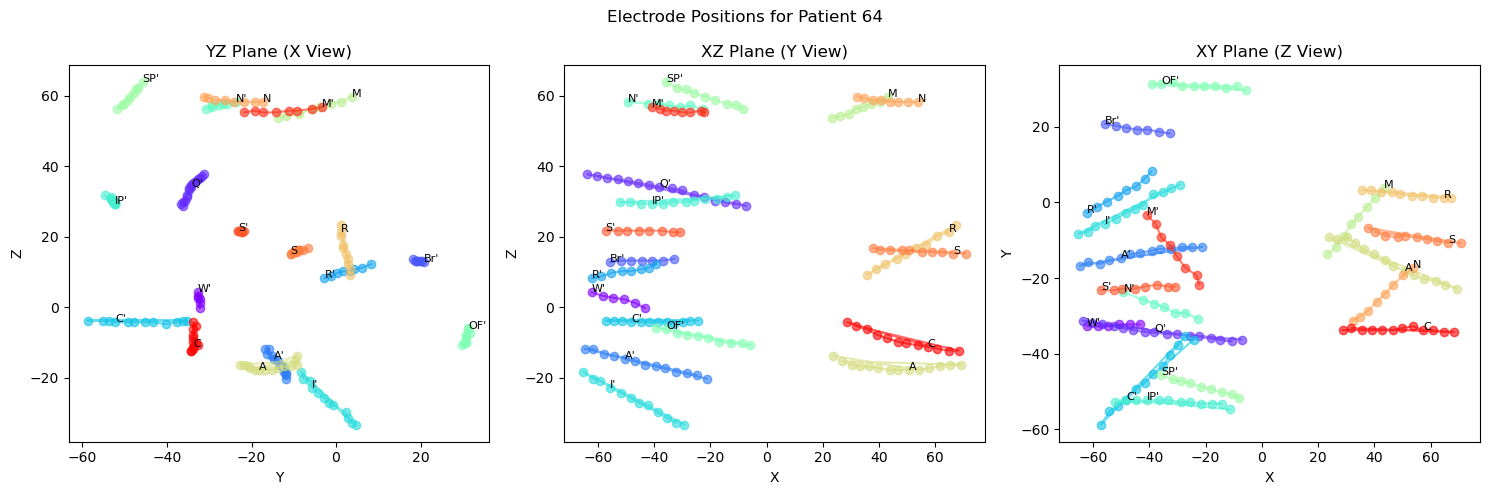

In [77]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f'Electrode Positions for Patient {pid}')

# Get patient specific data

# Create a color map for different electrode groups
unique_groups = patient_xyz['Egroup'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_groups)))
color_dict = dict(zip(unique_groups, colors))

# Plot for each plane
for group in unique_groups:
    group_data = patient_xyz[patient_xyz['Egroup'] == group]
    
    # Sort by electrode number to connect points in sequence
    group_data = group_data.sort_values('Electrode')
    
    # YZ plane (X view)
    ax1.plot(group_data['Y'], group_data['Z'], '-o', color=color_dict[group], label=group, alpha=0.6)
    ax1.text(group_data['Y'].iloc[-1], group_data['Z'].iloc[-1], group, fontsize=8)
    
    # XZ plane (Y view)
    ax2.plot(group_data['X'], group_data['Z'], '-o', color=color_dict[group], alpha=0.6)
    ax2.text(group_data['X'].iloc[-1], group_data['Z'].iloc[-1], group, fontsize=8)
    
    # XY plane (Z view)
    ax3.plot(group_data['X'], group_data['Y'], '-o', color=color_dict[group], alpha=0.6)
    ax3.text(group_data['X'].iloc[-1], group_data['Y'].iloc[-1], group, fontsize=8)

# Set labels and titles
ax1.set_title('YZ Plane (X View)')
ax1.set_xlabel('Y')
ax1.set_ylabel('Z')

ax2.set_title('XZ Plane (Y View)')
ax2.set_xlabel('X')
ax2.set_ylabel('Z')

ax3.set_title('XY Plane (Z View)')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

# Adjust layout
plt.tight_layout()
plt.show()

In [76]:
# print full patient df
pd.set_option('display.max_rows', None)
patient_xyz[['Electrode','soz','miccai','aryaG2']]

,Electrode,soz,miccai,aryaG2
4814,W'1,False,Left_Cerebral_White_Matter,LATERAL TEMPORAL
4815,W'2,False,Left_STG_superior_temporal_gyrus,LATERAL TEMPORAL
4816,W'3,False,Left_STG_superior_temporal_gyrus,LATERAL TEMPORAL
4817,W'4,False,Left_STG_superior_temporal_gyrus,LATERAL TEMPORAL
4818,W'5,False,Left_STG_superior_temporal_gyrus,LATERAL TEMPORAL
4819,W'6,False,Left_STG_superior_temporal_gyrus,LATERAL TEMPORAL
4820,Q'1,False,Left_Cerebral_White_Matter,LATERAL PARIETAL
4821,Q'2,False,Left_Cerebral_White_Matter,LATERAL PARIETAL
4822,Q'3,False,Left_Cerebral_White_Matter,LATERAL PARIETAL
4823,Q'4,False,Left_Cerebral_White_Matter,LATERAL PARIETAL
